In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [5]:
headerList = ['Detector ID', 'Loss Energy (MeV)']

originalData = pd.read_csv('SD_nt_Hit.csv', skiprows=6, names=headerList)
processedData = pd.DataFrame(columns=headerList)

In [6]:
originalData.head()

,Detector ID,Loss Energy (MeV)
0,1,0.000014
1,1,0.008499
2,1,0.002537
3,2,0.001300
4,2,0.003374


In [7]:
edep = 0

for i in range(1, len(originalData)):
    if originalData['Detector ID'][i] < originalData['Detector ID'][i-1]:
        break
    
    if originalData['Detector ID'][i] == originalData['Detector ID'][i-1]:
        edep += originalData['Loss Energy (MeV)'][i-1]
        
    else:
        edep += originalData['Loss Energy (MeV)'][i-1]
        processedData = processedData.append({'Detector ID': originalData['Detector ID'][i-1], 'Loss Energy (MeV)': edep}, ignore_index=True)
        edep = 0

In [8]:
processedData.head()

,Detector ID,Loss Energy (MeV)
0,1.0,0.011049
1,2.0,0.008849
2,3.0,0.010437
3,4.0,0.004148
4,5.0,0.007500


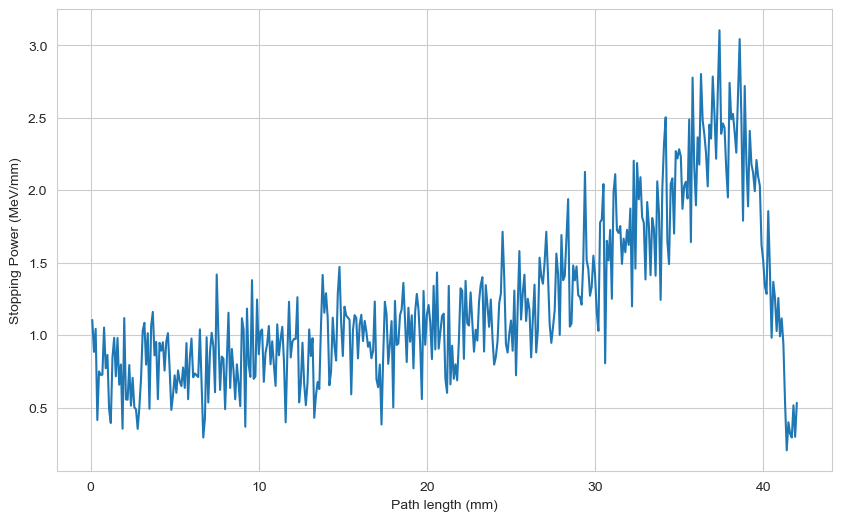

In [9]:
# plot data
# x = 0 to 50 mm
# y = Stopping Power (MeV/mm)
# you need to calculate the stopping power from the energy loss and step length
# stopping power = energy loss / step length

plt.figure(figsize=(10, 6))

X = processedData['Detector ID'] * 0.1
Y = processedData['Loss Energy (MeV)'] / 0.01

sns.set_style('whitegrid')
ax = sns.lineplot(x=X, y=Y, data=processedData)
ax.set(xlabel='Path length (mm)', ylabel='Stopping Power (MeV/mm)')
plt.show()

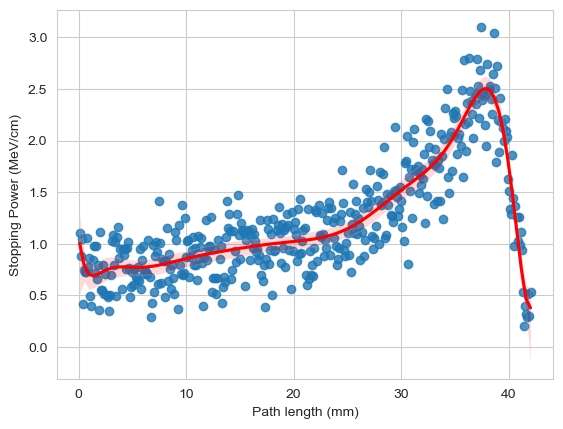

In [13]:
ax1 = sns.regplot(x=X, y=Y, data=processedData, order=15, line_kws={'color': 'red'})
ax1.set(xlabel='Path length (mm)', ylabel='Stopping Power (MeV/cm)')
plt.show()

In [ ]:
import plotly as py
import cufflinks as cf

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
cf.go_offline()